<a href="https://colab.research.google.com/github/msv5wx/launch/blob/master/AirBnB_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import files

uploaded = files.upload()

Saving AB_NYC_2019.csv to AB_NYC_2019.csv


In [0]:
#read in data
airbnb = pd.read_csv("AB_NYC_2019.csv")

In [399]:
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [0]:
#remove price = 0
airbnb = airbnb.loc[airbnb['price'] > 0]

## EDA

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


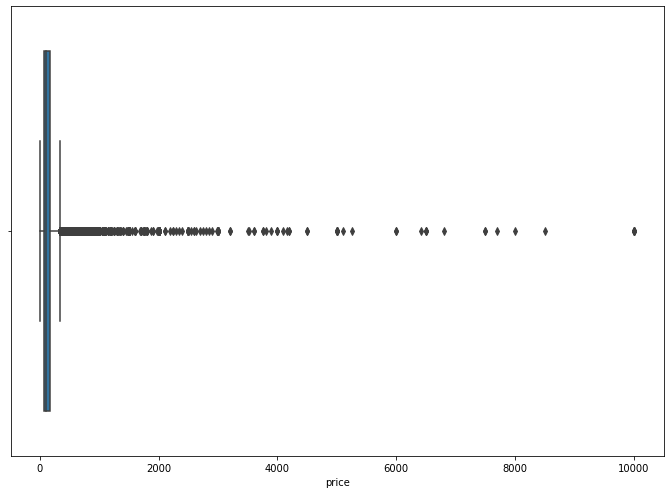

In [5]:
#check price variable distribution
import seaborn as sns
from matplotlib import pyplot

a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.boxplot(x=airbnb['price'])

In [0]:
def quantilefloor(df, colname, bounds = [.05,.95]):
    s = df[colname]
    q = s.quantile(bounds)
    return df[~s.clip(*q).isin(q)]

In [0]:
airbnb = quantilefloor(airbnb, 'price')

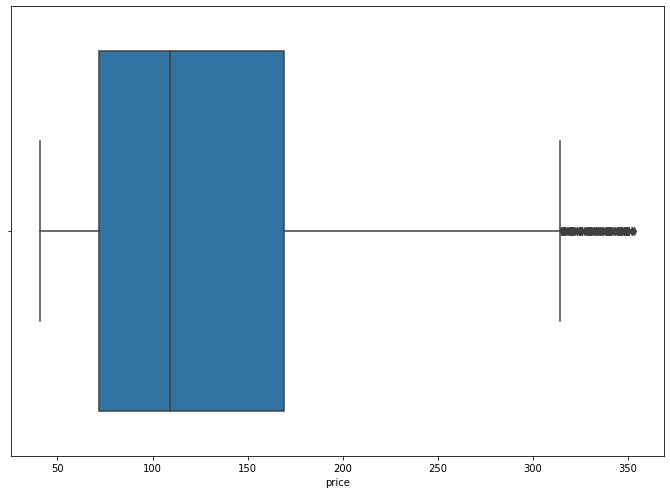

In [8]:
#check new price variable distribution
import seaborn as sns
from matplotlib import pyplot

a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.boxplot(x=airbnb['price'])

Text(0.5, 1.0, 'Distribution of Prices for Each Neighborhood Group')

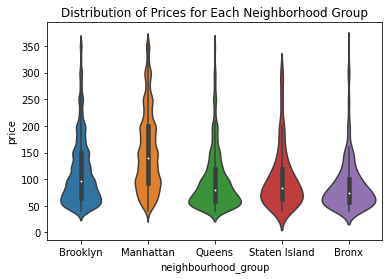

In [10]:
#using violinplot to showcase density and distribtuion of prices 
viz_2=sns.violinplot(data=airbnb, x='neighbourhood_group', y='price')
viz_2.set_title('Distribution of Prices for Each Neighborhood Group')

Manhattan has the highest range of prices for the listings with an average of a little less than 150 per night, followed by Brooklyn which has an average of a little less then 100 per night. Queens and Staten Island have similar distributions, and the Bronx has the cheapest prices of all

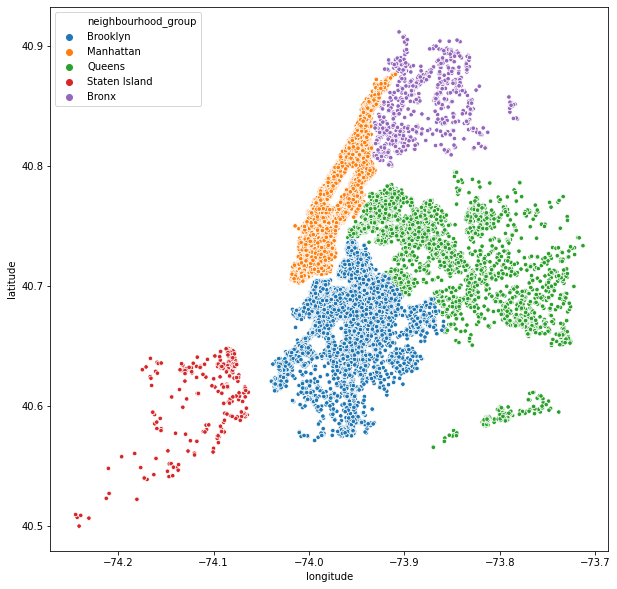

In [412]:
#geographical distribution of data points by neighborhood group
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,10))
sns.scatterplot(x='longitude', y='latitude', hue='neighbourhood_group',s=20, data=airbnb)
plt.show()

In [0]:
#drop variables unrelated to prediction
airbnb.drop(['id','host_name','last_review', 'name', 'host_id', 'neighbourhood'], axis=1, inplace=True)

In [337]:
airbnb.head(5)

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
2,Manhattan,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Brooklyn,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
7,Manhattan,40.76489,-73.98493,Private room,79,2,430,3.47,1,220


In [36]:
airbnb.isnull().sum()

neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [37]:
airbnb.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   neighbourhood                   48895 non-null  int64  
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   room_type                       48895 non-null  object 
 5   price                           48895 non-null  int64  
 6   minimum_nights                  48895 non-null  int64  
 7   number_of_reviews               48895 non-null  int64  
 8   reviews_per_month               38843 non-null  float64
 9   calculated_host_listings_count  48895 non-null  int64  
 10  availability_365                48895 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 4.1+ MB


In [0]:
#train/test split
np.random.seed(68)
from sklearn.model_selection import train_test_split
train, test = train_test_split(airbnb, test_size=0.2, random_state=150)

In [0]:
test.to_csv('airbnb_test.csv', sep=",", index = False)

In [0]:
ddf= train

In [524]:
y = ddf['price']
y.head()

24026     55
43381    150
2457     225
46697    289
37911    119
Name: price, dtype: int64

In [525]:
x=ddf.drop('price',axis=1)
x.head()

,neighbourhood_group,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
24026,Brooklyn,40.69201,-73.95795,Private room,2,3,0.12,1,0
43381,Brooklyn,40.66387,-73.93840,Entire home/apt,1,6,2.50,2,148
2457,Brooklyn,40.71038,-73.96299,Entire home/apt,3,56,0.79,1,55
46697,Queens,40.76358,-73.92399,Entire home/apt,3,0,NaN,1,253
37911,Brooklyn,40.73259,-73.94977,Shared room,1,0,NaN,33,180


In [0]:
#split into training and testing data
np.random.seed(68)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=150)

In [343]:
x_test.head()

,neighbourhood_group,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
20775,Manhattan,40.71523,-73.99242,Private room,25,11,0.37,5,323
16824,Bronx,40.83570,-73.91023,Entire home/apt,90,11,0.30,7,77
30949,Brooklyn,40.66780,-73.98106,Entire home/apt,2,0,NaN,3,0
19511,Queens,40.67203,-73.76711,Private room,1,0,NaN,2,179
10288,Brooklyn,40.68439,-73.95231,Entire home/apt,4,106,2.23,1,282


# scaling the data

In [0]:
from sklearn.impute import SimpleImputer 
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler

In [0]:
numeric = x_train.select_dtypes(include=['int64', 'float64']).columns

categorical = x_train.select_dtypes(include=['object']).columns

In [0]:
numeric_pipe = Pipeline(
    [('imputer', SimpleImputer(strategy='median')), 
     ('scaler', StandardScaler())]
)

In [0]:
from sklearn.preprocessing import OneHotEncoder
categorical_pipe = Pipeline(
    [('cat_imputer', SimpleImputer(strategy = 'most_frequent')), #Different null handling!
     ('encoder', OneHotEncoder())]
)

In [0]:
from sklearn.compose import ColumnTransformer

full_transformer = ColumnTransformer(
    transformers = [
        ('numeric', numeric_pipe, numeric),
        ('categorical', categorical_pipe, categorical)
    ]
)

In [0]:
#transform
x_train = full_transformer.fit_transform(x_train)

In [0]:
#transform
x_test = full_transformer.transform(x_test)

In [0]:
x_train = pd.DataFrame(x_train)

In [352]:
x_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-0.209384,-1.043642,-0.240620,-0.444585,-0.505137,-0.150438,-0.807115,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1.145472,0.275367,-0.292976,-0.550643,-0.362535,-0.150438,-0.807115,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1.259544,-0.338507,-0.292976,-0.147624,-0.330126,-0.150438,-0.807115,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,-0.289980,-0.220214,-0.240620,2.885617,1.257941,-0.036182,1.812511,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.177492,-0.432772,-0.188264,-0.508220,-0.770895,-0.150438,-0.807115,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [0]:
x_test = pd.DataFrame(x_test)

In [354]:
x_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-0.267603,-0.910794,0.963569,-0.317316,-0.563474,0.078075,1.741497,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1.924146,0.988126,4.366710,-0.317316,-0.608848,0.192331,-0.199551,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-1.130511,-0.648332,-0.240620,-0.550643,-0.362535,-0.036182,-0.807115,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-1.053554,4.294776,-0.292976,-0.550643,-0.362535,-0.093310,0.605274,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,-0.828684,0.015909,-0.135908,1.697774,0.642160,-0.150438,1.417989,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


# Linear Regression, Ridge, Lasso

In [0]:
from sklearn.linear_model import LinearRegression

In [467]:
lm = LinearRegression()
lm.fit(x_train, y_train)
lm.score(x_test, y_test)

0.43614946802755095

In [0]:
y_pred = lm.predict(x_test)

#ynewtest = np.expm1(y_test)
#y_pred = np.expm1(y_pred)

In [0]:
error_diff = pd.DataFrame({'Actual Values': np.array(y_test).flatten(), 'Predicted Values': y_pred.flatten()})
error_diff1 = error_diff.head(20)

In [436]:
error_diff1.head(5)

,Actual Values,Predicted Values
0,50,68.158825
1,100,132.030686
2,70,109.277980
3,60,88.644826
4,65,96.086745


In [469]:
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
RMSE

52.66798977544492

In [111]:
import plotly.graph_objs as go

title=['Pred vs Actual']
fig = go.Figure(data=[
    go.Bar(name='Predicted', x=error_diff1.index, y=error_diff1['Predicted Values']),
    go.Bar(name='Actual', x=error_diff1.index, y=error_diff1['Actual Values'])
])

fig.update_layout(barmode='group')
fig.show()

In [0]:
from sklearn.linear_model import Ridge

In [471]:
ridge = Ridge()
clf = ridge.fit(x_train, y_train)
clf.score(x_train, y_train)

0.4304791964084036

In [472]:
y_pred = ridge.predict(x_test)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
RMSE

52.667964942714164

In [0]:
from sklearn.linear_model import Lasso

In [474]:
clf2 = Lasso()
clf2.fit(x_train, y_train)
clf2.score(x_train, y_train)

0.41904124187140446

In [475]:
y_pred = clf2.predict(x_test)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
RMSE

53.21274772650455

# KNN

In [0]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [477]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(x_train,y_train)
model.best_params_

{'n_neighbors': 20}

In [478]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=20)
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

0.5128598563670834

In [479]:
y_pred = knn.predict(x_test)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
RMSE

48.95439697409189

Random Forest

In [0]:
from sklearn.ensemble import RandomForestRegressor

In [0]:
rf = RandomForestRegressor()

In [536]:
rf.fit(x_train, y_train)
rf.score(x_test,y_test)

0.5326763995091972

In [537]:
import sklearn.metrics as metrics

y_pred = rf.predict(x_test)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
RMSE

47.948342883655954

In [0]:
error_diff = pd.DataFrame({'Actual Values': np.array(y_test).flatten(), 'Predicted Values': predict.flatten()})
error_diff1 = error_diff.head(20)

In [539]:
error_diff1.head()

,Actual Values,Predicted Values
0,50,154.818074
1,175,217.615089
2,153,183.556837
3,56,91.603532
4,50,66.308157


In [540]:
title='Pred vs Actual'
fig = go.Figure(data=[
    go.Bar(name='Predicted', x=error_diff1.index, y=error_diff1['Predicted Values']),
    go.Bar(name='Actual', x=error_diff1.index, y=error_diff1['Actual Values'])
])
fig.update_layout(barmode='group')
fig.show()

Decision Tree

In [0]:
from sklearn.tree import DecisionTreeRegressor

In [0]:
tree = DecisionTreeRegressor()

In [486]:
tree.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [379]:
tree.score(x_test, y_test)

-0.2590218529594699

In [487]:
y_pred = tree.predict(x_test)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
RMSE

67.30679746473736

# SVM

In [0]:
from sklearn.svm import SVR

In [489]:
model = SVR(kernel='rbf') 
model.fit(x_train, y_train) 

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [383]:
model.score(x_test,y_test)

0.28346914686048696

In [490]:
y_pred = model.predict(x_test)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
RMSE

51.271544561291925

# Gradient Boost

In [0]:
from sklearn.ensemble import GradientBoostingRegressor
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.01)

In [495]:
GBoost.fit(x_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.01, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=3000,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
predict = GBoost.predict(x_test)

In [497]:
print("Root mean squared error is:")
np.sqrt(metrics.mean_squared_error(y_test,predict))

Root mean squared error is:


47.80030809869343

In [389]:
from sklearn.metrics import r2_score
print('r2 score is:')
r2 = r2_score(y_test,predict)
r2*100

r2 score is:


34.06400782213087

In [0]:
error_diff = pd.DataFrame({'Actual Values': np.array(y_test).flatten(), 'Predicted Values': predict.flatten()})
error_diff1 = error_diff.head(20)

In [75]:
error_diff1.head()

,Actual Values,Predicted Values
0,66,54.312484
1,280,310.726839
2,63,70.445545
3,36,60.471228
4,100,98.755323


In [76]:
title='Pred vs Actual'
fig = go.Figure(data=[
    go.Bar(name='Predicted', x=error_diff1.index, y=error_diff1['Predicted Values']),
    go.Bar(name='Actual', x=error_diff1.index, y=error_diff1['Actual Values'])
])
fig.update_layout(barmode='group')
fig.show()

# XGBoost

In [0]:
import xgboost as xgb
from xgboost import XGBRegressor

xgb = xgb.XGBRegressor(n_estimators=310,learning_rate=0.1,objective='reg:squarederror')
xgb.fit(x_train, y_train)
xgb_pred = xgb.predict(x_test)

In [492]:
print("Root mean squared error is:")
np.sqrt(metrics.mean_squared_error(y_test,xgb_pred))

Root mean squared error is:


47.76690418393541

In [119]:
print('r2 score is:')
r2 = r2_score(y_test,xgb_pred)
r2*100

r2 score is:


10.59403575229939

In [0]:
error_diff = pd.DataFrame({'Actual Values': np.array(y_test).flatten(), 'Predicted Values': xgb_pred.flatten()})
error_diff1 = error_diff.head(20)

In [505]:
error_diff1.head()

,Actual Values,Predicted Values
0,50,155.790573
1,175,220.911438
2,153,183.763733
3,56,90.849243
4,50,68.304420


In [508]:
fig = go.Figure(data=[
    go.Bar(name='Predicted', x=error_diff1.index, y=error_diff1['Predicted Values']),
    go.Bar(name='Actual', x=error_diff1.index, y=error_diff1['Actual Values'])
])
fig.update_layout(barmode='group')
fig.show()

# Bagged Decision Tree

In [0]:
from sklearn import model_selection 
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
import pandas as pd 

In [493]:
dtc = DecisionTreeRegressor()
bag_model=BaggingRegressor(base_estimator=dtc, n_estimators=100, bootstrap=True)
bag_model=bag_model.fit(x_train,y_train)
ytest_pred=bag_model.predict(x_test)
print(bag_model.score(x_test, y_test))

0.5307632721025761


In [396]:
RMSE = np.sqrt(metrics.mean_squared_error(ytest_pred, y_pred))
RMSE

10.126565479083611

In [0]:
error_difflowbt = pd.DataFrame({'Actual Values': np.array(ylow_test).flatten(), 'Predicted Values': ytest_pred.flatten()})
error_diff1low1bt = error_difflowbt.head(20)

In [221]:
title='Pred vs Actual'
fig = go.Figure(data=[
    go.Bar(name='Predicted', x=error_diff1low1bt.index, y=error_diff1low1bt['Predicted Values']),
    go.Bar(name='Actual', x=error_diff1low1bt.index, y=error_diff1low1bt['Actual Values'])
])
fig.update_layout(barmode='group')
fig.show()